In [1]:
import seaborn as sns
import pandas as pd
from constants import *
import pylab
import pingouin as pg
from scipy.stats import mannwhitneyu

/Users/arjunchandrasekhar/opt/anaconda3/envs/plant-architecture/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/arjunchandrasekhar/opt/anaconda3/envs/plant-architecture/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
IDEOTYPES = {'T' : 'Telephone',
             'dT' : 'Droopy Telephone', 'DT' : 'Droopy Telephone',
             'C' : 'Christmas Tree', 'CT' : 'Christmas Tree',
             'B' : 'Broomstick'}
CONDITIONS = {'S' : 'Salt', 'C': 'Control'}

In [3]:
pareto_front_df = pd.read_csv('%s/arbor_stats.csv' % STATISTICS_DIR, skipinitialspace=True)
pareto_front_df

,arbor name,pareto front distance,pareto front location
0,087_1_C_day4,1.279848,1.00
1,084_2_C_day2,0.213441,1.00
2,093_1_C_day2,0.447800,1.00
3,078_1_C_day4,0.161652,0.61
4,089_3_S_day4,1.013235,0.70
...,...,...,...
6267,044_5_C_day5,6.204867,0.80
6268,049_4_S_day3,0.017437,0.03
6269,024_3_C_day4,1.767278,0.16
6270,045_3_S_day4,0.622354,0.62


In [4]:
scaling_df = pd.read_csv('%s/scaling_distances.csv' % STATISTICS_DIR, skipinitialspace=True)
pareto_front_df = pd.merge(pareto_front_df, scaling_df)
pareto_front_df

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location
0,087_1_C_day4,1.279848,1.00,1.072667,0.83
1,084_2_C_day2,0.213441,1.00,1.036260,0.95
2,093_1_C_day2,0.447800,1.00,1.057325,0.70
3,078_1_C_day4,0.161652,0.61,1.024057,0.61
4,089_3_S_day4,1.013235,0.70,1.041909,0.48
...,...,...,...,...,...
6267,044_5_C_day5,6.204867,0.80,1.057932,0.45
6268,049_4_S_day3,0.017437,0.03,1.008220,0.12
6269,024_3_C_day4,1.767278,0.16,1.068680,0.20
6270,045_3_S_day4,0.622354,0.62,1.052271,0.63


In [5]:
dist_column = 'pareto front scaling distance'
loc_column = 'pareto front location'

In [6]:
metadata_df = pd.read_csv('%s/metadata.csv' % METADATA_DIR, skipinitialspace=True)
metadata_df['condition'] = metadata_df['condition'].map(CONDITIONS)
metadata_df['genotype'].unique()

array([103,  31,  55,  98, 101,  59,  34,  30,   2,   1,  76, 102, 104,
        80,   5,  81,  96,  28,  58,   9,  38,  79,  40,  35,  94,  74,
        10,  32,  22,   3, 105,  56,  95,  11, 106,  75,  12,  33,  97,
        13,   6,   7,  57,   8,  99,  29,  78,  37,  36, 292, 212, 307,
       282, 199, 278, 301, 287, 213, 214, 286, 194, 285, 284, 196, 201,
       279, 293, 280, 299, 207, 298, 200, 211, 308, 283, 306, 220, 290,
       198, 195, 289, 300, 288, 291, 277, 197, 189, 294, 235, 230, 234,
       173,  84, 240, 236, 241, 231, 176,  64, 228, 244, 237, 174, 274,
       249, 247,  91, 227, 250,  93, 229, 271, 239, 221, 233, 225, 245,
       273, 248,  89,  85, 259, 175,  87,  86,  92, 222,  90,  88, 192,
       270, 258, 140, 260, 138, 272, 168, 269, 144, 165, 255, 170, 251,
       169, 264, 262, 261,  65, 166, 167, 252, 147, 146, 193, 141, 267,
        61, 139,  83, 268, 253, 172,  82, 136, 191, 142,  66, 171,  60,
       143, 256,  63,  62, 182, 130, 117, 186, 127, 187, 159, 12

In [7]:
ideotypes_df = pd.read_csv('%s/manual_scoring_last_day.csv' % SCORING_DATA_DIR, skipinitialspace=True)
ideotypes_df['ideotype (T/C/B)'].replace('CT', 'C', inplace=True)
ideotypes_df['ideotype (T/C/B)'].replace('DT', 'dT', inplace=True)
ideotypes_df['ideotype'] = ideotypes_df['ideotype (T/C/B)'].map(IDEOTYPES)
ideotypes_df['condition'] = ideotypes_df['condition'].map(CONDITIONS)

In [8]:
ideotypes_df.dropna(subset=['ideotype'], inplace=True)
#ideotypes_df = ideotypes_df.astype({'genotype' : 'str'})
ideotypes_df['genotype'].unique()

array([  1,   2,   3,   5,   6,   8,   9,  10,  11,  12,  13,  14,  15,
        17,  19,  20,  21,  22,  23,  24,  27,  28,  29,  30,  31,  33,
        34,  35,  36,  37,  38,  40,  42,  43,  44,  45,  46,  48,  49,
        50,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  69,  70,  72,  73,  74,  75,  76,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  98,  99, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 138, 139, 140,
       141, 142, 143, 144, 146, 147, 149, 150, 151, 153, 154, 155, 156,
       157, 158, 159, 160, 162, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 178, 179, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 207, 211, 212, 213, 214, 220, 221, 222, 225, 227, 22

In [9]:
arbor_stats_df = pd.merge(pareto_front_df, metadata_df)
arbor_stats_df

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location,experiment,day,Picture #,genotype,replicate,condition
0,087_1_C_day4,1.279848,1.00,1.072667,0.83,PimpiBig3,4,268,87,1,Control
1,084_2_C_day2,0.213441,1.00,1.036260,0.95,PimpiBig3,2,203,84,2,Control
2,093_1_C_day2,0.447800,1.00,1.057325,0.70,PimpiBig3,2,35,93,1,Control
3,078_1_C_day4,0.161652,0.61,1.024057,0.61,PimpiBig4,4,267,78,1,Control
4,089_3_S_day4,1.013235,0.70,1.041909,0.48,PimpiBig3,4,283,89,3,Salt
...,...,...,...,...,...,...,...,...,...,...,...
6962,044_5_C_day5,6.204867,0.80,1.057932,0.45,PimpiBig6,5,146,44,5,Control
6963,049_4_S_day3,0.017437,0.03,1.008220,0.12,PimpiBig6,3,54,49,4,Salt
6964,024_3_C_day4,1.767278,0.16,1.068680,0.20,PimpiBig6,4,67,24,3,Control
6965,045_3_S_day4,0.622354,0.62,1.052271,0.63,PimpiBig6,4,228,45,3,Salt


In [10]:
last_day_arbors = arbor_stats_df.sort_values('day', ascending=False)
last_day_arbors = last_day_arbors.drop_duplicates(['experiment', 'genotype', 'replicate', 'condition'])
last_day_arbors

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location,experiment,day,Picture #,genotype,replicate,condition
2350,175_4_S_day5,0.710242,0.70,1.043097,0.70,PimpiBig3,5,233,175,4,Salt
4323,272_2_C_day5,4.050140,0.67,1.062995,0.54,PimpiBig2,5,133,272,2,Control
4556,262_2_S_day5,0.802342,0.35,1.014512,0.32,PimpiBig2,5,224,262,2,Salt
4560,220_1_S_day5,0.337981,0.25,1.065998,0.43,PimpiBig1,5,179,220,1,Salt
4563,241_1_C_day5,5.867808,0.73,1.041713,0.48,PimpiBig3,5,39,241,1,Control
...,...,...,...,...,...,...,...,...,...,...,...
4799,108_1_c_day2,0.318227,0.46,1.057827,0.53,PimpiBig5,2,49,108,1,NaN
5019,125_4_s_day2,0.099945,0.43,1.029435,0.60,PimpiBig5,2,50,125,4,NaN
5048,155_2_c_day2,0.154040,0.17,1.027116,0.18,PimpiBig5,2,54,155,2,NaN
5884,84_2_C_day1,1.072504,0.15,1.071864,0.28,PimpiBig5,1,124,84,2,Control


In [11]:
last_day_arbors.dtypes

arbor name                        object
pareto front distance            float64
pareto front location            float64
pareto front scaling distance    float64
pareto front scaling location    float64
experiment                        object
day                                int64
Picture #                          int64
genotype                           int64
replicate                          int64
condition                         object
dtype: object

In [12]:
ideotypes_df.dtypes

experiment          object
Picture #            int64
genotype             int64
condition           object
ideotype (T/C/B)    object
size (L/M/S)        object
Sodium gap?         object
comments extra      object
ideotype            object
dtype: object

In [13]:
last_day_arbors['genotype'].unique()

array([175, 272, 262, 220, 241, 214, 256,  87,  13,  30,  65,  91, 229,
       273,  35, 264, 283, 231, 284, 227, 250, 237,   5,   1, 172, 194,
       292, 213, 236, 245, 146, 259, 274, 271, 248, 240,  64,  31,  95,
        82, 212, 247, 197, 136, 174,  12, 168,  96,  56, 171, 165,   3,
        75,  37, 258,  81, 239,  94, 230, 251, 140,   8, 102, 293,  98,
        80, 142, 176,   6,  32, 173,  57, 192, 101, 298, 169, 105, 191,
       170, 198,  29, 307, 138, 167, 244, 211, 269,  90,   7,   9,  10,
        61,  78, 285, 106, 253, 144,  76,  89,   2, 277, 235, 260, 193,
       139, 222, 141, 294,  38,  85,  92, 195, 291,  33,  84, 267, 270,
        66, 147,  93,  58, 300,  99, 201, 104, 228, 189,  11, 166, 199,
        83, 249, 282,  28,  22, 221, 261, 234, 308, 103, 306, 200, 207,
       252, 286, 280, 279, 288, 233, 290,  60,  79,  40,  36,  63,  74,
       278,  59, 143,  88,  55,  34,  86, 287, 301, 268, 255, 299, 289,
        97, 225,  54,  72,  46,  14,  20,  15,  27,  73,  50,  4

In [14]:
ideotypes_df['genotype'].unique()

array([  1,   2,   3,   5,   6,   8,   9,  10,  11,  12,  13,  14,  15,
        17,  19,  20,  21,  22,  23,  24,  27,  28,  29,  30,  31,  33,
        34,  35,  36,  37,  38,  40,  42,  43,  44,  45,  46,  48,  49,
        50,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  69,  70,  72,  73,  74,  75,  76,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  98,  99, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 138, 139, 140,
       141, 142, 143, 144, 146, 147, 149, 150, 151, 153, 154, 155, 156,
       157, 158, 159, 160, 162, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 178, 179, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 207, 211, 212, 213, 214, 220, 221, 222, 225, 227, 22

In [15]:
arbor_ideotypes = pd.merge(last_day_arbors, ideotypes_df)
arbor_ideotypes

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location,experiment,day,Picture #,genotype,replicate,condition,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,175_4_S_day5,0.710242,0.70,1.043097,0.70,PimpiBig3,5,233,175,4,Salt,dT,M,N,NaN,Droopy Telephone
1,272_2_C_day5,4.050140,0.67,1.062995,0.54,PimpiBig2,5,133,272,2,Control,T,L,NaN,bit dried up plate,Telephone
2,262_2_S_day5,0.802342,0.35,1.014512,0.32,PimpiBig2,5,224,262,2,Salt,dT,M,Y,NaN,Droopy Telephone
3,220_1_S_day5,0.337981,0.25,1.065998,0.43,PimpiBig1,5,179,220,1,Salt,B,S,Y,NaN,Broomstick
4,241_1_C_day5,5.867808,0.73,1.041713,0.48,PimpiBig3,5,39,241,1,Control,T,L,NaN,NaN,Telephone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,284_2_S_day3,0.861726,0.28,1.092508,0.53,PimpiBig1,3,104,284,2,Salt,C,M,D,infected,Christmas Tree
1378,288_2_S_day3,0.508947,0.25,1.104715,0.63,PimpiBig1,3,204,288,2,Salt,B,S,N,infected,Broomstick
1379,284_1_S_day3,0.730972,0.67,1.054581,0.62,PimpiBig1,3,160,284,1,Salt,B,L,Y,infected,Broomstick
1380,195_3_C_day3,0.859156,0.31,1.085516,0.44,PimpiBig1,3,120,195,3,Control,T,M,NaN,infected,Telephone


In [16]:
sns.set()

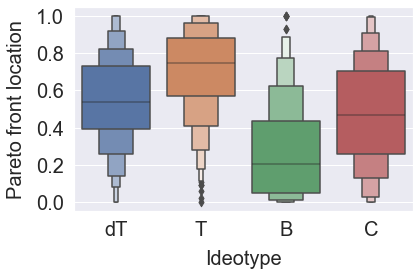

In [17]:
#pylab.figure(figsize=(12.8, 4.8))
sns.boxenplot(x='ideotype (T/C/B)', y=loc_column, data=arbor_ideotypes)
pylab.xlabel('Ideotype', fontsize=20, labelpad=10)
pylab.ylabel('Pareto front location', fontsize=20, labelpad=10)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.tight_layout()
pylab.savefig('%s/alpha_distribution_ideotype.pdf' % LOCATION_ANALYSIS_PLOTS_DIR,
              format='pdf')

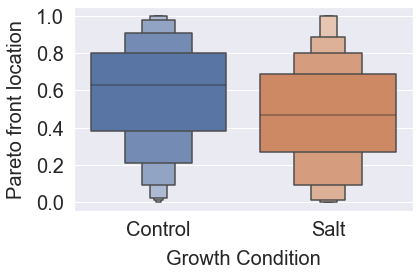

In [18]:
#pylab.figure(figsize=(6.4, 4.8))
sns.boxenplot(x='condition', y=loc_column, data=arbor_ideotypes, order=['Control', 'Salt'])
pylab.xlabel('Growth Condition', fontsize=20, labelpad=10)
pylab.ylabel('Pareto front location', fontsize=20, labelpad=10)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.tight_layout()
pylab.savefig('%s/alpha_distribution_condition.pdf' % LOCATION_ANALYSIS_PLOTS_DIR,
              format='pdf')

In [19]:
control_alpha = arbor_ideotypes[arbor_ideotypes['condition'] == 'Control'][loc_column]
salt_alpha = arbor_ideotypes[arbor_ideotypes['condition'] == 'Salt'][loc_column]
print(control_alpha.mean(), "+/", control_alpha.std(ddof=1))
print(salt_alpha.mean(), "+/", salt_alpha.std(ddof=1))
print(mannwhitneyu(control_alpha, salt_alpha))

0.5834517045454546 +/ 0.2798275031499562
0.4726991150442478 +/ 0.2766543113799677
MannwhitneyuResult(statistic=184005.5, pvalue=8.577833530110383e-14)


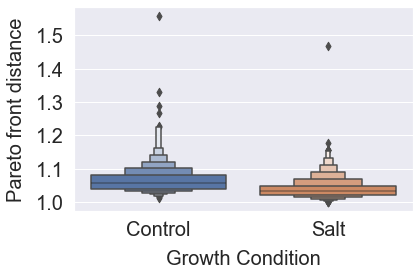

In [20]:
#pylab.figure(figsize=(6.4, 4.8))
sns.boxenplot(x='condition', y=dist_column, data=arbor_ideotypes, order=['Control', 'Salt'])
pylab.xlabel('Growth Condition', fontsize=20, labelpad=10)
pylab.ylabel('Pareto front distance', fontsize=20, labelpad=10)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.tight_layout()
pylab.savefig('%s/dist_distribution_condition.pdf' % LOCATION_ANALYSIS_PLOTS_DIR,
              format='pdf')

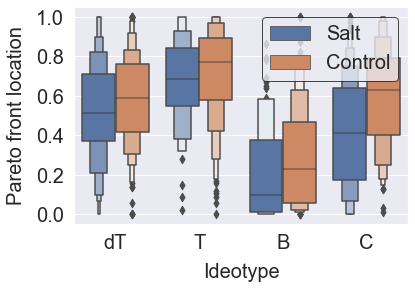

In [21]:
#pylab.figure(figsize=(15, 4.8))
sns.boxenplot(x='ideotype (T/C/B)', y=loc_column, hue='condition', data=arbor_ideotypes)
pylab.xlabel('Ideotype', fontsize=20, labelpad=10)
pylab.ylabel('Pareto front location', fontsize=20, labelpad=10)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.legend(frameon=True, fontsize=20, edgecolor='k', loc='upper right')
pylab.show()

In [22]:
# we need to rename this column with a one word name to play nice with pingouin's N-way ANOVA
arbor_ideotypes['alpha'] = arbor_ideotypes[loc_column]
pg.anova(data=arbor_ideotypes, dv='alpha', between=['ideotype', 'condition'])

,Source,SS,DF,MS,F,p-unc,np2
0,ideotype,21.334607,3.0,7.111536,115.195132,1.530228e-66,0.200970
1,condition,2.520918,1.0,2.520918,40.834716,2.263244e-10,0.028862
2,ideotype * condition,0.705204,3.0,0.235068,3.807715,9.838654e-03,0.008245
3,Residual,84.823462,1374.0,0.061735,NaN,NaN,NaN


In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
arbor_ideotypes = arbor_ideotypes.astype({'genotype' : 'int'})

In [25]:
md = smf.mixedlm("alpha ~ ideotype*condition + (1|genotype)",
                 data=arbor_ideotypes,
                 groups=arbor_ideotypes['genotype'])

In [26]:
mdf = md.fit()

In [27]:
print(mdf.summary())

                          Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            alpha   
No. Observations:              1382               Method:                        REML    
No. Groups:                    239                Scale:                         0.0512  
Min. group size:               1                  Log-Likelihood:                -28.6381
Max. group size:               10                 Converged:                     Yes     
Mean group size:               5.8                                                       
-----------------------------------------------------------------------------------------
                                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                       0.338    0.029 11.813 0.000  0.282  0.394
ideotype[T.Christmas Tree]          

In [28]:
pg.normality(data=arbor_ideotypes, dv='alpha', group='ideotype')

,W,pval,normal
Droopy Telephone,0.985400,4.910990e-05,False
Telephone,0.928427,2.475459e-11,False
Broomstick,0.883231,8.783486e-11,False
Christmas Tree,0.969186,6.508296e-07,False


In [29]:
pg.kruskal(data=arbor_ideotypes, dv='alpha', between='ideotype')

,Source,ddof1,H,p-unc
Kruskal,ideotype,3,275.91768,1.618573e-59


In [30]:
import scikit_posthocs as sp

In [31]:
sp.posthoc_mannwhitney(arbor_ideotypes, val_col='alpha', group_col='ideotype')

,Broomstick,Christmas Tree,Droopy Telephone,Telephone
Broomstick,1.000000e+00,2.221605e-15,2.864102e-29,6.596046e-45
Christmas Tree,2.221605e-15,1.000000e+00,6.607707e-04,3.462047e-26
Droopy Telephone,2.864102e-29,6.607707e-04,1.000000e+00,2.236355e-21
Telephone,6.596046e-45,3.462047e-26,2.236355e-21,1.000000e+00


In [32]:
sp.posthoc_mannwhitney(arbor_ideotypes, val_col='alpha', group_col='condition')

,Control,Salt
Control,1.000000e+00,1.715567e-13
Salt,1.715567e-13,1.000000e+00


In [33]:
arbor_ideotypes[['ideotype', 'alpha']].groupby('ideotype').agg(['mean', 'std'])

alpha          
                      mean       std
ideotype                            
Broomstick        0.274022  0.265849
Christmas Tree    0.479250  0.279859
Droopy Telephone  0.544427  0.241445
Telephone         0.705604  0.230006

In [34]:
arbor_ideotypes[['condition', 'alpha']].groupby('condition').agg(['mean', 'std'])

alpha          
               mean       std
condition                    
Control    0.583452  0.279828
Salt       0.472699  0.276654

<AxesSubplot:xlabel='condition', ylabel='count'>

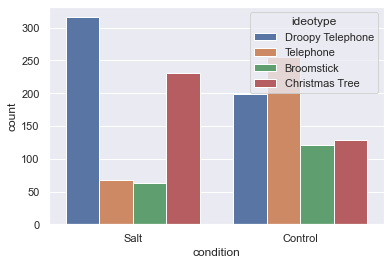

In [35]:
sns.countplot(x='condition', hue='ideotype', data=arbor_ideotypes)

In [36]:
arbor_ideotypes['alpha']

0       0.70
1       0.67
2       0.35
3       0.25
4       0.73
        ... 
1377    0.28
1378    0.25
1379    0.67
1380    0.31
1381    1.00
Name: alpha, Length: 1382, dtype: float64

<AxesSubplot:xlabel='alpha'>

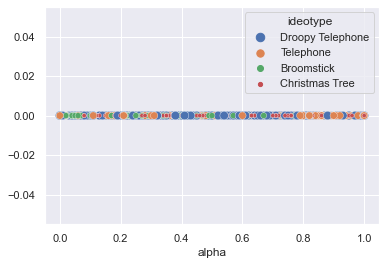

In [37]:
sns.scatterplot(x='alpha', y=0, hue='ideotype', size='ideotype', data=arbor_ideotypes)

In [38]:
import sklearn